## Building Machine Learning Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Importing ml algorithms

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier as knc
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier as gbc
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.metrics import confusion_matrix as cm,classification_report as cr,accuracy_score as acs

In [4]:
df=pd.read_csv("emp_normalized.csv")

In [5]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
df["Attrition"].unique()

array([0., 1.])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546221 entries, 0 to 546220
Data columns (total 46 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                546221 non-null  float64
 1   Attrition                          546221 non-null  float64
 2   DailyRate                          546221 non-null  float64
 3   DistanceFromHome                   546221 non-null  float64
 4   Education                          546221 non-null  float64
 5   EnvironmentSatisfaction            546221 non-null  float64
 6   HourlyRate                         546221 non-null  float64
 7   JobInvolvement                     546221 non-null  float64
 8   JobLevel                           546221 non-null  float64
 9   JobSatisfaction                    546221 non-null  float64
 10  MonthlyIncome                      546221 non-null  float64
 11  NumCompaniesWorked                 5462

In [8]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Department_Software', 'Department_Support',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing D

In [9]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67)

# Training the ml models 

## Logistic Regression

In [18]:
model=lg().fit(x_train,y_train)
p=model.predict(x_test)
p

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [19]:
print("Training Accuracy:",model.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p))

Training Accuracy: 0.503746201164366
------------------------------------------------------------
Testing Accuracy: 0.4993455078035608
------------------------------------------------------------
confusion_matrix:
 [[26528 28200]
 [26494 28023]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49     54728
           1       0.50      0.51      0.51     54517

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Decision tree

In [11]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train, y_train)
print("DecisionTreeClassifier")
p1=dtc1.predict(x_test)
p1

DecisionTreeClassifier


array([0., 1., 0., ..., 0., 1., 1.])

In [12]:
print("Training Accuracy:",dtc1.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p1))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p1))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p1))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.508133095336171
------------------------------------------------------------
confusion_matrix:
 [[27958 26770]
 [26964 27553]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     54728
         1.0       0.51      0.51      0.51     54517

    accuracy                           0.51    109245
   macro avg       0.51      0.51      0.51    109245
weighted avg       0.51      0.51      0.51    109245



from sklearn import tree
plt.figure(figsize=(24,14))
tree.plot_tree(dtc1,filled=True,fontsize=14)
plt.show()

## Random Forest Classifier

In [24]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [25]:
print("Training Accuracy:",classifier.score(x_train,y_train))
print("------------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,y_pred))
print("------------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,y_pred))
print("------------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,y_pred))

Training Accuracy: 0.9865965178865659
------------------------------------------------------------------
Testing Accuracy: 0.5070804155796604
------------------------------------------------------------------
confusion_matrix:
 [[34335 20393]
 [33456 21061]]
------------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56     54728
           1       0.51      0.39      0.44     54517

    accuracy                           0.51    109245
   macro avg       0.51      0.51      0.50    109245
weighted avg       0.51      0.51      0.50    109245



## KNeighbors Classifier

In [26]:
kneighbor=knc().fit(x_train,y_train)

p5=kneighbor.predict(x_test)

In [27]:
print("Training Accuracy:",kneighbor.score(x_train,y_train))
print("---------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p5))
print("---------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p5))
print("---------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p5))

Training Accuracy: 0.6873512504119219
---------------------------------------------------------------
Testing Accuracy: 0.5009565655178727
---------------------------------------------------------------
confusion_matrix:
 [[27345 27383]
 [27135 27382]]
---------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     54728
           1       0.50      0.50      0.50     54517

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## xgboost

In [28]:
import xgboost as xgb

In [29]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

[14:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
predictions = xgb_classifier.predict(x_test)

In [31]:
print("Training Accuracy:",xgb_classifier.score(x_train,y_train))
print("---------------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,predictions))
print("---------------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,predictions))
print("---------------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,predictions))

Training Accuracy: 0.5957512540734503
---------------------------------------------------------------------
Testing Accuracy: 0.5149617831479701
---------------------------------------------------------------------
confusion_matrix:
 [[27897 26831]
 [26157 28360]]
---------------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.52      0.51      0.51     54728
           1       0.51      0.52      0.52     54517

    accuracy                           0.51    109245
   macro avg       0.51      0.51      0.51    109245
weighted avg       0.51      0.51      0.51    109245



## Naive Bayes

In [32]:
gnb=GaussianNB()
model6=gnb.fit(x_train, y_train,sample_weight=100)  
p6=model6.predict(x_test)

In [33]:
print("Training Accuracy:",model6.score(x_train,y_train))
print("----------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p6))
print("----------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p6))
print("----------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p6))

Training Accuracy: 0.5025973966533631
----------------------------------------------------------------
Testing Accuracy: 0.49982150212824383
----------------------------------------------------------------
confusion_matrix:
 [[25994 28734]
 [25908 28609]]
----------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.50      0.47      0.49     54728
           1       0.50      0.52      0.51     54517

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Gradient Boosting Classifier

In [34]:
gradient=gbc().fit(x_train,y_train)
p8=gradient.predict(x_test)

In [35]:
print("Training Accuracy:",gradient.score(x_train,y_train))
print("--------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p8))
print("--------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p8))
print("--------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p8))

Training Accuracy: 0.5195090805902384
--------------------------------------------------------
Testing Accuracy: 0.4987596686347201
--------------------------------------------------------
confusion_matrix:
 [[27109 27619]
 [27139 27378]]
--------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     54728
           1       0.50      0.50      0.50     54517

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## CatBoost Classifier

In [11]:
clf2 = CatBoostClassifier(
    iterations=100000, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf2.fit(x_train, y_train, verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())
p11=clf2.predict(x_test)

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 100000, 'learning_rate': 0.1}


In [12]:
print("Training Accuracy:",clf2.score(x_train,y_train))
print("--------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p11))
print("--------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p11))
print("--------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p11))

Training Accuracy: 0.9969380469407931
--------------------------------------------------------
Testing Accuracy: 0.6464002929195845
--------------------------------------------------------
confusion_matrix:
 [[35437 19291]
 [19338 35179]]
--------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.65      0.65      0.65     54728
         1.0       0.65      0.65      0.65     54517

    accuracy                           0.65    109245
   macro avg       0.65      0.65      0.65    109245
weighted avg       0.65      0.65      0.65    109245



## Light gbm

In [11]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)

Wall time: 14min 42s


In [12]:
print("Training Accuracy:",lgbm.score(x_train,y_train))
print("--------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,y_pred))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,y_pred))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,y_pred))

Training Accuracy: 0.8573422796675332
--------------------------------------------------------
Testing Accuracy: 0.683225776923429
-------------------------------------------------------------
confusion_matrix:
 [[37412 17316]
 [17290 37227]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.68      0.68      0.68     54728
         1.0       0.68      0.68      0.68     54517

    accuracy                           0.68    109245
   macro avg       0.68      0.68      0.68    109245
weighted avg       0.68      0.68      0.68    109245



<AxesSubplot:>

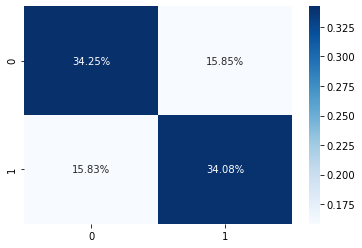

In [13]:
confusion_matrix=cm(y_test,y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix),annot=True,fmt=".2%",cmap="Blues")

## Cross Validation using Kfold

In [13]:
from sklearn.model_selection import KFold
Kfold_validation=KFold(7)
from sklearn.model_selection import cross_val_score
results=cross_val_score(lgbm,x,y,cv=Kfold_validation)
print(results)

[0.69818792 0.69415112 0.70119951 0.6911139  0.6968897  0.69377555
 0.69776115]


In [14]:
print(np.mean(results))

0.6961541207021197


## Hyperparameter tuning using GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
         
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


## ANN

In [27]:
from keras.models import Sequential
from keras .layers import Dense

In [28]:
classifier=Sequential()

classifier.add(Dense(activation="relu",input_dim=45,units=200,kernel_initializer="uniform"))

classifier.add(Dense(activation="relu",units=200,kernel_initializer="uniform"))

classifier.add(Dense(1,activation="sigmoid"))

classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
import tensorflow as tf
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [30]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size =100,epochs =50,callbacks=early_stopping)

Epoch 1/50
2928/2928 [==============================] - 16s 6ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.4987
Epoch 2/50
2928/2928 [==============================] - 14s 5ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 3/50
2928/2928 [==============================] - 14s 5ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4988
Epoch 4/50
2928/2928 [==============================] - 14s 5ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4979
Epoch 5/50
2928/2928 [==============================] - 14s 5ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 6/50
2928/2928 [==============================] - 13s 5ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6934 - val_accuracy: 0.4994
Epoch 7/50
2928/2928 [==============================] - 14s 5ms/step - loss: 0.6931 - accuracy: 0.5054 - val_loss: 0.6933 - val_ac

##  Performance Measurement of models using roc curve

In [40]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p1[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred[:,], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p11[:,], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [41]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, p[:,])
auc_score2 = roc_auc_score(y_test, p1[:,])
auc_score3 = roc_auc_score(y_test, y_pred[:,])
auc_score4 = roc_auc_score(y_test, p11[:,])



print(auc_score1, auc_score2,auc_score3,auc_score4)

0.4987248438125179 0.5422218310575464 0.6942880171181395 0.6500665631174926


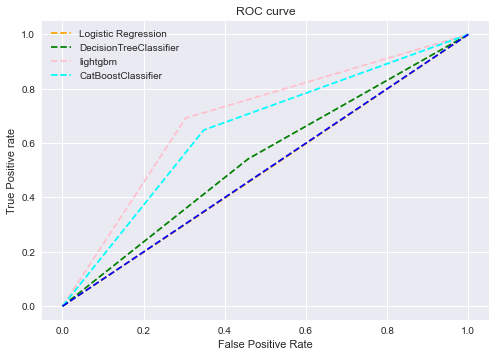

In [42]:
#matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DecisionTreeClassifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='lightgbm')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='CatBoostClassifier')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### As Lightgbm got the highest accuracy among the models so we are using this model for deployment.

In [17]:
lgbm.booster_.save_model("lgbm1.json")